In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
!nvidia-smi

Wed Mar 25 14:22:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Code below is inspired and comes from:

**[Machine Learning Mastery by Jason Brownlee](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

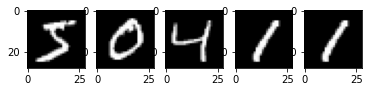

In [6]:
plt.subplot(151)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(152)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(153)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(154)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(155)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

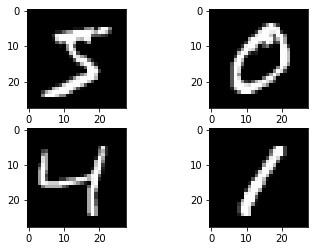

In [7]:
# Plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.utils import np_utils

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

model = Sequential()

# model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 - 8s - loss: 0.3733 - accuracy: 0.8873 - val_loss: 0.0829 - val_accuracy: 0.9750
Epoch 2/30
60000/60000 - 1s - loss: 0.0957 - accuracy: 0.9703 - val_loss: 0.0550 - val_accuracy: 0.9816
Epoch 3/30
60000/60000 - 1s - loss: 0.0698 - accuracy: 0.9787 - val_loss: 0.0491 - val_accuracy: 0.9833
Epoch 4/30
60000/60000 - 1s - loss: 0.0558 - accuracy: 0.9825 - val_loss: 0.0412 - val_accuracy: 0.9853
Epoch 5/30
60000/60000 - 1s - loss: 0.0497 - accuracy: 0.9837 - val_loss: 0.0328 - val_accuracy: 0.9892
Epoch 6/30
60000/60000 - 1s - loss: 0.0442 - accuracy: 0.9859 - val_loss: 0.0357 - val_accuracy: 0.9893
Epoch 7/30
60000/60000 - 1s - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.0330 - val_accuracy: 0.9880
Epoch 8/30
60000/60000 - 1s - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0259 - val_accuracy: 0.9900
Epoch 9/30
60000/60000 - 1s - loss: 0.0330 - accuracy: 0.9892 - val_loss: 0.0277 - val_accuracy: 0.9906
Epoch 10/30
60

Using CPU, it takes ~6 seconds per epoch, using GPU, it takes ~2 seconds per epoch on this simple neural network exercise.

In [0]:
# Save whole model for download
model.save("model.h5")

In [11]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 2.5MB/s 
     |████████████████████████████████| 104.6MB 70kB/s 
     |████████████████████████████████| 256kB 76.3MB/s 
     |████████████████████████████████| 921kB 78.4MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=a6335a078c1753d8119b93edb26505b46fbecb280ed01236b0b5dcf3f8e69f0e
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3


In [0]:
!tensorflowjs_converter --input_format keras '/content/model.h5' '/content/model'